In [61]:
#imports 

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from PIL import Image
import os
import random
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from keras.utils import to_categorical
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

In [10]:
data = []
labels = []
classes = 43

cur_path = '/Users/brockada/Desktop/GermanTrafficSigns'

for i in range(classes):
    path = os.path.join(cur_path,'Train', str(i))
    images = os.listdir(path)
    
    for a in images:
        try:
            image = Image.open(path + '/' + a)
            image = image.resize((30,30))
            image = np.array(image)
            
            data.append(image)
            labels.append(i)
        except:
            print("There was an error with the path.")

            
data = np.array(data)
labels = np.array(labels)

In [11]:
print(len(data))

39209


In [12]:
print(data.shape, labels.shape)

#Splitting training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

(39209, 30, 30, 3) (39209,)


In [13]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(31367, 30, 30, 3) (7842, 30, 30, 3) (31367,) (7842,)


In [14]:
#Converting the labels into one hot encoding
y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)

In [15]:
#Building the model
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(43, activation='softmax'))

Metal device set to: Apple M1 Pro


2023-01-20 14:21:30.651825: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-01-20 14:21:30.652265: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [16]:
#Compilation of the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [17]:
epochs = 15
history = model.fit(X_train, y_train, batch_size=32, epochs=epochs, validation_data=(X_test, y_test))
model.save("my_model.h5")

Epoch 1/15


2023-01-20 14:21:32.933340: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


  1/981 [..............................] - ETA: 6:10 - loss: 47.2622 - accuracy: 0.0625

2023-01-20 14:21:33.153020: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


981/981 [==============================] - ETA: 0s - loss: 1.5873 - accuracy: 0.6063

2023-01-20 14:21:42.766428: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


981/981 [==============================] - 11s 11ms/step - loss: 1.5873 - accuracy: 0.6063 - val_loss: 0.2450 - val_accuracy: 0.9434
Epoch 2/15
981/981 [==============================] - 11s 11ms/step - loss: 0.4053 - accuracy: 0.8886 - val_loss: 0.1287 - val_accuracy: 0.9699
Epoch 3/15
981/981 [==============================] - 11s 11ms/step - loss: 0.2837 - accuracy: 0.9231 - val_loss: 0.2061 - val_accuracy: 0.9463
Epoch 4/15
981/981 [==============================] - 11s 11ms/step - loss: 0.2346 - accuracy: 0.9375 - val_loss: 0.1199 - val_accuracy: 0.9711
Epoch 5/15
981/981 [==============================] - 11s 11ms/step - loss: 0.2203 - accuracy: 0.9436 - val_loss: 0.0901 - val_accuracy: 0.9788
Epoch 6/15
981/981 [==============================] - 11s 11ms/step - loss: 0.1902 - accuracy: 0.9511 - val_loss: 0.1043 - val_accuracy: 0.9748
Epoch 7/15
981/981 [==============================] - 11s 11ms/step - loss: 0.2024 - accuracy: 0.9490 - val_loss: 0.0622 - val_accuracy: 0.9850
Epo

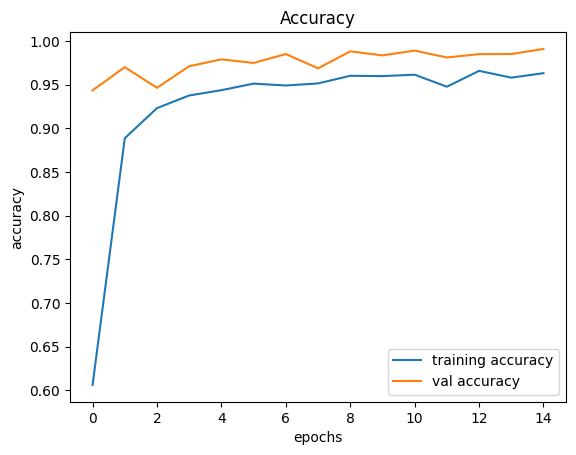

In [18]:
#graphs showing Accuracy by epoch 
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()


In [19]:
#testing model using test dataset

y_test = pd.read_csv('Test.csv')

In [63]:
labels = y_test['ClassId'].values
images = y_test['Path'].values

data = []

for image in images:
    img = Image.open(image)
    img = img.resize((30,30))
    data.append(np.array(img))
    
X_test = np.array(data)

y_pred=model.predict(X_test) 
y_pred=np.argmax(y_pred, axis=1)

print(accuracy_score(labels, y_pred))

395/395 [==============================] - 1s 2ms/step
0.9593824228028504
